In [4]:
# Importamos las clases necesarias para concretar el modelo de datos correspondiente al precio de las casas

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pickle as pkl

In [5]:
# Cargamos los datos de entrada

data = pd.read_csv("../data/datos_limpios.csv")

# Vemos como están compuesto los datos limpios

data.head()

,Unnamed: 0,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


In [6]:
# Vemos cual es la media, el valor mínimo y el valor máximo

data.describe()

,Unnamed: 0,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04
mean,10798.000000,4.580474e+09,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,5.402966e+05
std,6234.661218,2.876736e+09,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950,3.673681e+05
min,0.000000,1.000102e+06,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.800000e+04
25%,5399.000000,2.123049e+09,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,3.220000e+05
50%,10798.000000,3.904930e+09,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,4.500000e+05
75%,16197.000000,7.308900e+09,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,6.450000e+05
max,21596.000000,9.900000e+09,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06


In [7]:
# Visualizamos rápidamente las caraterísticas de entrada

data.drop(['Unnamed: 0','Unnamed: 0.1', 'id', 'condition', 'grade', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_basement', 'lat', 'long', 'sqft_lot', 'sqft_lot15', 'sqft_living15', 'sqft_lot15', '' 'sqft_above'],1).hist()
plt.show()

C:\Users\patri\AppData\Local\Temp/ipykernel_21808/3046783441.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data.drop(['Unnamed: 0','Unnamed: 0.1', 'id', 'condition', 'grade', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_basement', 'lat', 'long', 'sqft_lot', 'sqft_lot15', 'sqft_living15', 'sqft_lot15', '' 'sqft_above'],1).hist()


KeyError: "['Unnamed: 0.1'] not found in axis"

In [8]:
# Vamos a crear el mejorar el modelo, con tres dimensiones: el precio, los metros cuadrados y las unidades de baños y 
# habitaciones. Para lograr ello creamos una nueva variable suma que será la suma de los baños, las plantas y las habitaciones
# Esta única dimension se sumará a la del precio más la de los metros cuadrados

filtered_data = data[(data['price'] <= 1500000) & (data['sqft_living'] <= 3000)]

suma = (filtered_data["bathrooms"] + filtered_data['floors'].fillna(0) + filtered_data['bedrooms'])
dataX2 =  pd.DataFrame()
dataX2["sqft_living"] = filtered_data["sqft_living"] 
dataX2["suma"] = suma
XY_train = np.array(dataX2)
z_train = filtered_data['price'].values

In [9]:
# Creamos un nuevo objeto de Regresión Lineal

regr2 = linear_model.LinearRegression()

# Entrenamos el modelo, esta vez, con tres dimensiones obtendremos dos coeficientes, para graficar un plano

regr2.fit(XY_train, z_train)

# Hacemos la predicción con la que tendremos puntos sobre el plano hallado

z_pred = regr2.predict(XY_train)

# Los coeficientes

print('Coefficients: \n', regr2.coef_)

# Error cuadrático medio

print("Mean squared error: %.2f" % mean_squared_error(z_train, z_pred))

# Evaluamos el puntaje de varianza (siendo 1.0 el mejor posible)

print('Variance score: %.2f' % r2_score(z_train, z_pred))

Coefficients: 
 [  193.41400133 -6523.99108789]
Mean squared error: 30537709782.74
Variance score: 0.26


C:\Users\patri\AppData\Local\Temp/ipykernel_21808/710374546.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


Text(0.5, 0.92, 'Regresión lineal precio de las casas')

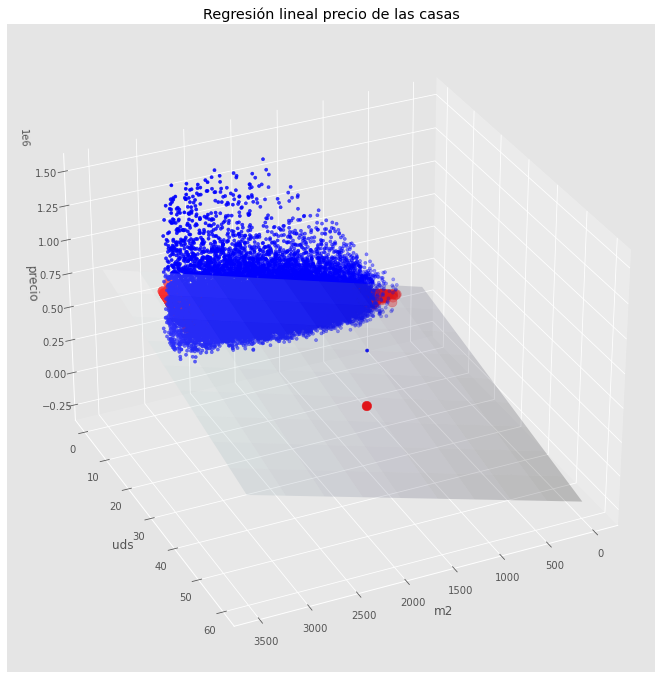

In [10]:
fig = plt.figure()
ax = Axes3D(fig)

# Creamos una malla, sobre la cual graficaremos el plano

xx, yy = np.meshgrid(np.linspace(0, 3500, num=10), np.linspace(0, 60, num=10))

# Calculamos los valores del plano para los puntos x e y

nuevoX = (regr2.coef_[0] * xx)
nuevoY = (regr2.coef_[1] * yy) 

# Calculamos los correspondientes valores para z. Debemos sumar el punto de intercepción

z = (nuevoX + nuevoY + regr2.intercept_)

# Graficamos el plano

ax.plot_surface(xx, yy, z, alpha=0.2, cmap='bone')

# Graficamos en azul los puntos en 3D

ax.scatter(XY_train[:, 0], XY_train[:, 1], z_train, c='blue',s=10) 

# Graficamos en rojo los puntos en 3D

ax.scatter(XY_train[:, 0], XY_train[:, 1], z_pred, c='red',s=90) 
ax.view_init(elev=30., azim=65)

# Nombramos las distintas columnas y el título del gráfico

ax.set_xlabel('m2')
ax.set_ylabel('uds')
ax.set_zlabel('precio')
ax.set_title('Regresión lineal precio de las casas')

In [11]:
# Hacemos unas predicciones de una casa con 2080 metros cuadrados con tres baños, dos plantas y cuatro habitaciones 

prediccion = regr2.predict([[2080, 3+2+4]])
print(int(prediccion))

# El resultado de la predicción del precio es de: 492572 según el modelo creado

492572


In [12]:
# Hacemos unas predicciones de una casa con 4000 metros cuadrados con cuatro baños, tres plantas y cinco habitaciones 

prediccion2 = regr2.predict([[4000, 4+3+5]])
print(int(prediccion2))

# El resultado de la predicción del precio es de: 844355 según el modelo creado

844355


In [13]:
# Hacemos unas predicciones de una casa con 110 metros cuadrados con dos baños, una planta y tres habitaciones 

prediccion2 = regr2.predict([[110, 2+1+3]])
print(int(prediccion2))

# El resultado de la predicción del precio es de: 131119 según el modelo creado

131119


In [14]:
pkl.dump(regr2, open('model.pkl', 'wb'))